# 02 – Training Model CNN untuk SIMPLIcity

Tujuan:
- Menggabungkan konfigurasi, loader dataset, dan arsitektur model.
- Menjalankan proses training dengan Adam + learning rate schedule.
- Mengaktifkan EarlyStopping dan ModelCheckpoint.
- Menyimpan history dan plot kurva training/validation loss & accuracy.


In [8]:
import sys
import pathlib

import matplotlib.pyplot as plt
import tensorflow as tf

# Setup path
PROJECT_ROOT = pathlib.Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

from src import config
from src import dataset
from src import model as model_module
from src import utils
from src import train as train_module  # untuk reuse fungsi compile/optimizer/callbacks

print("Project root :", PROJECT_ROOT)
print("Data root    :", config.DATA_ROOT)
print("Model dir    :", config.MODEL_DIR)


Project root : /home/tumanggors/github/neuralcomp/simplicity_cnn
Data root    : /home/tumanggors/github/neuralcomp/simplicity_cnn/data/SIMPLIcity
Model dir    : /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models


In [9]:
utils.set_seed()
utils.ensure_directories()


In [10]:
train_ds = dataset.get_train_dataset(batch_size=config.BATCH_SIZE)
val_ds = dataset.get_validation_dataset(batch_size=config.BATCH_SIZE)

for images, labels in train_ds.take(1):
    print("Train batch - images shape:", images.shape)
    print("Train batch - labels shape:", labels.shape)
    break


Train batch - images shape: (16, 224, 224, 3)
Train batch - labels shape: (16, 10)


In [11]:
cnn_model = model_module.build_model(name=config.MODEL_NAME)
cnn_model.summary()


Model: "simplicity_cnn_tf"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block1_conv (Conv2D)       │ (None, 224, 224, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block1_bn                  │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block1_relu (ReLU)         │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block2_conv (Conv2D)       │ (None, 224, 224, 32)   │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block2_bn                  │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block2_relu (ReLU)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block3_conv (Conv2D)       │ (None, 224, 224, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block3_bn                  │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block3_relu (ReLU)         │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling          │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,570 (95.98 KB)

 Trainable params: 24,346 (95.10 KB)

 Non-trainable params: 224 (896.00 B)

In [12]:
# Reuse fungsi dari src/train.py
optimizer = train_module.build_optimizer_with_schedule()
callbacks = train_module.build_callbacks()

cnn_model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


In [13]:
EPOCHS = config.EPOCHS

history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1,
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2050 - loss: 2.1825
Epoch 1: val_accuracy improved from None to 0.14000, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.2740 - loss: 2.0094 - val_accuracy: 0.1400 - val_loss: 2.2597
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3814 - loss: 1.6717
Epoch 2: val_accuracy did not improve from 0.14000
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4120 - loss: 1.6618 - val_accuracy: 0.1000 - val_loss: 2.2417
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4478 - loss: 1.5980
Epoch 3: val_accuracy improved from 0.14000 to 0.15667, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4720 - loss: 1.5377 - val_accuracy: 0.1567 - val_loss: 2.2378
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5005 - loss: 1.4847
Epoch 4: val_accuracy improved from 0.15667 to 0.22000, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4860 - loss: 1.4991 - val_accuracy: 0.2200 - val_loss: 2.2267
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5256 - loss: 1.4131
Epoch 5: val_accuracy did not improve from 0.22000
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5240 - loss: 1.4148 - val_accuracy: 0.1833 - val_loss: 2.1774
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5474 - loss: 1.3214
Epoch 6: val_accuracy did not improve from 0.22000
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5080 - loss: 1.3654 - val_accuracy: 0.2067 - val_loss: 2.1410
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5632 - loss: 1.2718
Epoch 7: val_accuracy did not improve from 0.22000
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5380 - loss: 1.3075 - val_accuracy: 0.2067 - val_loss: 2.0999
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6000 - loss: 1.3102
Epoch 8: val_accuracy improved from 0.22000 to 0.30667,

32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5880 - loss: 1.3201 - val_accuracy: 0.3067 - val_loss: 1.9520
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5593 - loss: 1.3283
Epoch 9: val_accuracy improved from 0.30667 to 0.40000, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5560 - loss: 1.3047 - val_accuracy: 0.4000 - val_loss: 1.7311
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5515 - loss: 1.3172
Epoch 10: val_accuracy did not improve from 0.40000
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5740 - loss: 1.2339 - val_accuracy: 0.3700 - val_loss: 1.6798
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5985 - loss: 1.1920
Epoch 11: val_accuracy did not improve from 0.40000
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5820 - loss: 1.2388 - val_accuracy: 0.3567 - val_loss: 1.6469
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5623 - loss: 1.2621
Epoch 12: val_accuracy improved from 0.40000 to 0.51667, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5640 - loss: 1.2438 - val_accuracy: 0.5167 - val_loss: 1.4093
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6344 - loss: 1.1138
Epoch 13: val_accuracy improved from 0.51667 to 0.61667, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6500 - loss: 1.0937 - val_accuracy: 0.6167 - val_loss: 1.2224
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6096 - loss: 1.1861
Epoch 14: val_accuracy improved from 0.61667 to 0.62000, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6120 - loss: 1.1884 - val_accuracy: 0.6200 - val_loss: 1.1993
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6145 - loss: 1.1571
Epoch 15: val_accuracy improved from 0.62000 to 0.65333, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6000 - loss: 1.1786 - val_accuracy: 0.6533 - val_loss: 1.1338
Epoch 16/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6275 - loss: 1.1673
Epoch 16: val_accuracy improved from 0.65333 to 0.71333, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6360 - loss: 1.1317 - val_accuracy: 0.7133 - val_loss: 1.0782
Epoch 17/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6159 - loss: 1.1024
Epoch 17: val_accuracy did not improve from 0.71333
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6300 - loss: 1.1065 - val_accuracy: 0.5333 - val_loss: 1.3080
Epoch 18/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6631 - loss: 1.0210
Epoch 18: val_accuracy improved from 0.71333 to 0.75000, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6500 - loss: 1.0573 - val_accuracy: 0.7500 - val_loss: 0.9688
Epoch 19/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6427 - loss: 1.0856
Epoch 19: val_accuracy did not improve from 0.75000
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6240 - loss: 1.1028 - val_accuracy: 0.6867 - val_loss: 0.9574
Epoch 20/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6381 - loss: 1.0140
Epoch 20: val_accuracy did not improve from 0.75000
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6100 - loss: 1.1040 - val_accuracy: 0.6900 - val_loss: 0.9572
Epoch 21/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6441 - loss: 1.0417
Epoch 21: val_accuracy improved from 0.75000 to 0.79667, saving model to /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6400 - loss: 1.0503 - val_accuracy: 0.7967 - val_loss: 0.8675
Epoch 22/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6897 - loss: 1.0018
Epoch 22: val_accuracy did not improve from 0.79667
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6780 - loss: 1.0157 - val_accuracy: 0.6533 - val_loss: 1.0318
Epoch 23/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6160 - loss: 1.0818
Epoch 23: val_accuracy did not improve from 0.79667
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6420 - loss: 1.0578 - val_accuracy: 0.7133 - val_loss: 0.9363
Epoch 24/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6517 - loss: 0.9570
Epoch 24: val_accuracy did not improve from 0.79667
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6320 - loss: 1.0324 - val_accuracy: 0.7700 - val_loss: 0.8038
Epoch 25/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6778 - loss: 0.9769
Epoch 25: val_accuracy did not improve from 0.79

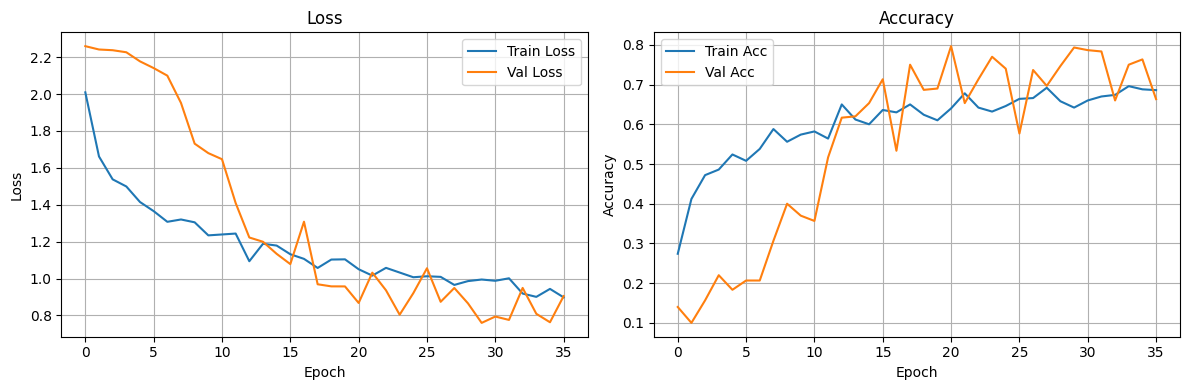

In [14]:
# Simpan ke CSV + JSON
utils.save_history(history)

# Buat dan simpan plot loss & accuracy
utils.plot_training_curves(history)

# Tampilkan plot di notebook
hist_dict = utils.history_to_dict(history)

train_loss = hist_dict.get("loss", [])
val_loss = hist_dict.get("val_loss", [])
train_acc = hist_dict.get("accuracy", hist_dict.get("acc", []))
val_acc = hist_dict.get("val_accuracy", hist_dict.get("val_acc", []))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Loss
axes[0].plot(train_loss, label="Train Loss")
if val_loss:
    axes[0].plot(val_loss, label="Val Loss")
axes[0].set_title("Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True)

# Accuracy
axes[1].plot(train_acc, label="Train Acc")
if val_acc:
    axes[1].plot(val_acc, label="Val Acc")
axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Catatan Singkat Hasil Training

Beberapa hal yang perlu diperhatikan dari kurva dan log:

- Apakah **training loss** dan **validation loss** sama-sama turun dan relatif stabil?
- Apakah terjadi **overfitting** (training accuracy naik tinggi tetapi validation accuracy stagnan atau turun)?
- Titik di mana **EarlyStopping** berhenti akan menjadi indikasi jumlah epoch efektif yang dibutuhkan model.

Informasi ini akan menjadi dasar untuk:
- Menyesuaikan hyperparameter (misalnya `learning_rate`, `batch_size`, atau `Dropout`).
- Membandingkan hasil dengan arsitektur lain jika dilakukan eksperimen lanjutan.
